# 3803ICT Big Data Assignment - Code

## PART 1 DATA PREPERATION AND PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re

In [2]:
#Get high level view of the data
baseDataFrame = pd.read_csv('data/data.csv', low_memory=False)
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")
baseDataFrame.head(10)

The Dataset consists of:  318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [3]:
#Get data types
baseDataFrame.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [4]:
#Fix the date data type since it is in wrong format
baseDataFrame["Date"] = baseDataFrame["Date"].replace(to_replace=r'T.*', value='', regex=True)
baseDataFrame["Date"] = pd.to_datetime(baseDataFrame["Date"])
baseDataFrame.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [5]:
#Fix full description data type
# Clear HTML tags from Full Description if they're present
# Only uncomment when required - this code takes a significant amount of time to process.
# from bs4 import BeautifulSoup
# for row in range(0, len(baseDataFrame["FullDescription"])):
#     soup = BeautifulSoup(baseDataFrame["FullDescription"][row])
#     baseDataFrame["FullDescription"][row] = soup.get_text()
# baseDataFrame.head(200)

In [6]:
#Remove duplicates in data
baseDataFrame = baseDataFrame.drop_duplicates(subset=['Company', 'Title', 'Location', 'Area', 'Classification', 'SubClassification',
                                                     'Requirement', 'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType'])
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")

The Dataset consists of:  303146  rows and  13  columuns


In [7]:
# Include average salary for use in analysis
baseDataFrame = baseDataFrame.assign(AverageSalary= (baseDataFrame["LowestSalary"] + baseDataFrame["HighestSalary"])/2 )

# Include salaray range for use in analysis
baseDataFrame = baseDataFrame.assign(SalaryRange= (baseDataFrame["HighestSalary"] - baseDataFrame["LowestSalary"]) )

baseDataFrame.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0,30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0,30
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15.0,30
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0,30


In [8]:
# Cull any data past the 8 digit ID and change type to ID
baseDataFrame['Id'] = baseDataFrame['Id'].apply(lambda x: x[:8])
baseDataFrame = baseDataFrame.astype({"Id": int})
baseDataFrame.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
SalaryRange                   int64
dtype: object

In [9]:
#Determine range of every column
# Print the domains of all non-freeform fields
# Free-form fields are Requirement and FullDescription, where each entry is expected to be unique so the domain is limitless.
print(f"ID: [{min(baseDataFrame['Id'])}, {max(baseDataFrame['Id'])}] (mathematical domain)")
print(f"Date: {min(baseDataFrame['Date'])} to {max(baseDataFrame['Date'])} (date range)")
print(f"Location: {baseDataFrame.Location.unique()}")
print(f"Area: {baseDataFrame.Area.unique()}")
print(f"Classification: {baseDataFrame.Classification.unique()}")
print(f"Sub-Classification: {baseDataFrame.SubClassification.unique()}")
print(f"Job Type: {baseDataFrame.JobType.unique()}")
print(f"Lowest Salary: [{min(baseDataFrame['LowestSalary'])}, {max(baseDataFrame['LowestSalary'])}] (mathematical domain)")
print(f"Highest Salary: [{min(baseDataFrame['HighestSalary'])}, {max(baseDataFrame['HighestSalary'])}] (mathematical domain)")
print(f"Average Salary: [{min(baseDataFrame['AverageSalary'])}, {max(baseDataFrame['AverageSalary'])}] (mathematical domain)")
print(f"Salary Range: [{min(baseDataFrame['SalaryRange'])}, {max(baseDataFrame['SalaryRange'])}] (mathematical domain)")

ID: [31671087, 38566133] (mathematical domain)
Date: 2018-10-01 00:00:00 to 2019-03-13 00:00:00 (date range)
Location: ['Sydney' 'Richmond & Hawkesbury' 'Brisbane' 'Gosford & Central Coast'
 'Adelaide' 'Melbourne' 'Perth' 'Mackay & Coalfields' 'Sunshine Coast'
 'Gold Coast' 'West Gippsland & Latrobe Valley'
 'Hervey Bay & Fraser Coast' 'South West Coast VIC'
 'Mornington Peninsula & Bass Coast' 'Port Hedland, Karratha & Pilbara'
 'Ballarat & Central Highlands' 'Bendigo, Goldfields & Macedon Ranges'
 'Yarra Valley & High Country' 'Coffs Harbour & North Coast'
 'Newcastle, Maitland & Hunter' 'Tumut, Snowy & Monaro' 'Darwin'
 'Toowoomba & Darling Downs' 'ACT' 'Wollongong, Illawarra & South Coast'
 'Port Macquarie & Mid North Coast' 'Southern Highlands & Tablelands'
 'Albury Area' 'Yorke Peninsula & Clare Valley'
 'Kalgoorlie, Goldfields & Esperance' 'Far West & North Central NSW'
 'Cairns & Far North' 'Wagga Wagga & Riverina' 'Lismore & Far North Coast'
 'Alice Springs & Central Australia

Salary Range: [10, 799] (mathematical domain)


In [10]:
for i in baseDataFrame:
    print(i)
    print(len(baseDataFrame[i].unique()))

Id
289575
Title
168065
Company
40629
Date
163
Location
66
Area
20
Classification
31
SubClassification
339
Requirement
234288
FullDescription
250902
LowestSalary
11
HighestSalary
11
JobType
5
AverageSalary
11
SalaryRange
5


In [11]:
#Set any of lowest salary that equals 0 to nan
#baseDataFrame['LowestSalary'] = baseDataFrame['LowestSalary'].replace([0],'NaN')
#baseDataFrame.head(10)

In [12]:
print(baseDataFrame.isna().sum())

Id                        0
Title                     0
Company               11850
Date                      0
Location             111051
Area                 183994
Classification       111051
SubClassification    111051
Requirement               7
FullDescription       15408
LowestSalary              0
HighestSalary             0
JobType               15336
AverageSalary             0
SalaryRange               0
dtype: int64


In [13]:
#Remove all rows that contain null data (65.2% of the data contains null values)
#baseDataFrame = baseDataFrame.dropna()

In [14]:
#print(baseDataFrame.isna().sum())

In [15]:
#Print high level view of data after changes
print("Data after pre-processing completed")
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")
baseDataFrame.head(10)


Data after pre-processing completed
The Dataset consists of:  303146  rows and  15  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0,30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0,30
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15.0,30
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0,30


In [16]:
baseDataFrame.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
SalaryRange                   int64
dtype: object

In [17]:
baseDataFrame["Company"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                               Aldi Stores
1                                               Aldi Stores
2                                       LB Creative Pty Ltd
3                                    Anaconda Group Pty Ltd
4            Commonwealth Bank - Business & Private Banking
                                ...                        
318472                                              Talenza
318473    Talent – Winner ‘Seek Large Recruitment Agency...
318474                     Retail Career Consulting Pty Ltd
318475                                           Moir Group
318476                                   Austcorp Executive
Name: Company, Length: 303146, dtype: object>

In [18]:
#Analysis missing cells
emptyFrame = baseDataFrame.loc[0:, ['Location', 'Area', 'Classification', 'SubClassification']]
emptyFrame = emptyFrame.isna()
print(emptyFrame.value_counts())
#Analysis missing cells
emptyFrame = baseDataFrame.loc[0:, ['Location', 'Area']]
emptyFrame = emptyFrame.isna()
print(emptyFrame.value_counts())

Location  Area   Classification  SubClassification
False     False  False           False                119152
True      True   True            True                 111051
False     True   False           False                 72943
dtype: int64
Location  Area 
False     False    119152
True      True     111051
False     True      72943
dtype: int64


## PART 2 Data Analysis

### Job Meta Data

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [20]:
#Extract information about the job sectors
#Drop NaN values in classifcation
classDataFrame = baseDataFrame.dropna(subset=['Classification', 'SubClassification'])
print("There is", len(baseDataFrame["Classification"].unique()), "different sectors")
print("These sectors contain", len(baseDataFrame["SubClassification"].unique()), "sub sectors")


count = {}
for x in classDataFrame.groupby(['Classification','SubClassification']).size().reset_index()['Classification']:
    if(x in count):
        count[x] = count[x] + 1
    else:
        count[x] = 1
largestValue = 0
largestSector = "";
for x in count:
    if(count[x] > largestValue):
        largestValue = count[x];
        largestSector = x;
print(largestSector, "has the most subsectors with ", largestValue, "subsectors")

There is 31 different sectors
These sectors contain 339 sub sectors
Healthcare & Medical has the most subsectors with  33 subsectors


In [21]:
#Extract information about the locations
#Drop empty data
locationDataFrame =  baseDataFrame.dropna(subset=['Location'])
print(baseDataFrame.shape[0] - locationDataFrame.shape[0], "NaN values removed")
print("There is a total of",len(baseDataFrame["Location"].unique()), "locations" )
value_bins = baseDataFrame["Location"].value_counts()
top_10_Locations = value_bins[0:10]
print("The top 10 most common locations are:")
print(top_10_Locations)
print("The top 6 are all capital cities but no darwin")

111051 NaN values removed
There is a total of 66 locations
The top 10 most common locations are:
Sydney                          58787
Melbourne                       45290
Brisbane                        21043
Perth                           12958
Adelaide                         6506
ACT                              6114
Newcastle, Maitland & Hunter     3890
Gold Coast                       3518
South West Coast VIC             1758
Mackay & Coalfields              1682
Name: Location, dtype: int64
The top 6 are all capital cities but no darwin


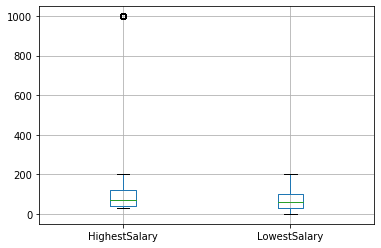

In [22]:
#Analysis range of salary
#salaryDataFrame = baseDataFrame.dropna(subset=['LowestSalary'])
#pd.to_numeric(salaryDataFrame['LowestSalary'])
#Show outliers
boxplot = baseDataFrame.boxplot(column=['HighestSalary', 'LowestSalary'])
#Remove outliers in wages
from scipy import stats
salaryDataFrame = baseDataFrame[(np.abs(stats.zscore(baseDataFrame['HighestSalary'])) < 3)]
salaryDataFrame = salaryDataFrame[(np.abs(stats.zscore(salaryDataFrame['LowestSalary'])) < 3)]

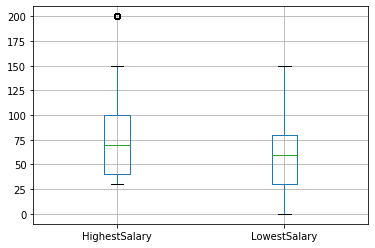

In [23]:
boxplot = salaryDataFrame.boxplot(column=['HighestSalary', 'LowestSalary'])

In [24]:
salaryDataFrame.groupby(['HighestSalary']).size()

HighestSalary
30     60455
40     22229
50     33127
60     26031
70     27399
80     27439
100    22697
120    25992
150    22947
200    24106
dtype: int64

In [25]:
salaryDataFrame.groupby(['LowestSalary']).size()

LowestSalary
0      60455
30     22229
40     33127
50     26031
60     27399
70     27439
80     22697
100    25992
120    22947
150    24106
dtype: int64

In [26]:
#Analysis the dates of the posting
print("Latest Posting is:", baseDataFrame["Date"].max())
print("Earlisest Posting is:", baseDataFrame["Date"].min())

Latest Posting is: 2019-03-13 00:00:00
Earlisest Posting is: 2018-10-01 00:00:00


In [27]:
#Analysis job titles
print("There is", len(baseDataFrame["Title"].unique()), "unique job titles")
print("at", len(baseDataFrame["Company"].unique()), "companies\n")
print("The top 10 job titles are: ")
value_bins = baseDataFrame["Title"].value_counts()
top_10_title = value_bins[0:10]
print(top_10_title, "\n")
print("The top 10 companies with the most jobs are: ")
value_bins = baseDataFrame["Company"].value_counts()
top_10_Company = value_bins[0:10]
print(top_10_Company, "\n")
print("The top 10 sectors are: ")
value_bins = baseDataFrame["Classification"].value_counts()
top_10_Classification = value_bins[0:10]
print(top_10_Classification, "\n")

There is 168065 unique job titles
at 40629 companies

The top 10 job titles are: 
Project Manager                 1220
Business Analyst                 811
Business Development Manager     787
Administration Assistant         707
Executive Assistant              646
Receptionist                     605
Registered Nurse                 573
Customer Service Officer         493
Administration Officer           477
Account Manager                  400
Name: Title, dtype: int64 

The top 10 companies with the most jobs are: 
Jora Local                                                                          8689
Hudson                                                                              1606
Design & Build                                                                      1378
Robert Walters                                                                      1341
Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!    1253
Paxus                        

In [28]:
#Analysis job type
typeDataFrame =  baseDataFrame.dropna(subset=['JobType'])
print("There are", len(typeDataFrame['JobType'].unique()), "job types")
print("These are: ",typeDataFrame['JobType'].unique())
print("The amount of each are:")
print(typeDataFrame['JobType'].value_counts())

There are 4 job types
These are:  ['Full Time' 'Contract/Temp' 'Part Time' 'Casual/Vacation']
The amount of each are:
Full Time          191460
Contract/Temp       51276
Casual/Vacation     24165
Part Time           20909
Name: JobType, dtype: int64


### Market by Locations

In [29]:
#Find the common sector for each sector
dataFrame =  baseDataFrame.dropna(subset=['Location', 'Classification'])
dataFrame =  dataFrame.loc[0:, ['Location','Classification']]
grouped_df = dataFrame.groupby("Location")
maximums = grouped_df.max()
maximums = maximums.reset_index()

for index, row in maximums.iterrows():
    print(row['Location'], "most common sector is: " ,row['Classification'])

    

ACT most common sector is:  Trades & Services
Adelaide most common sector is:  Trades & Services
Adelaide Hills & Barossa most common sector is:  Trades & Services
Albany & Great Southern most common sector is:  Trades & Services
Albury Area most common sector is:  Trades & Services
Alice Springs & Central Australia most common sector is:  Trades & Services
Bairnsdale & Gippsland most common sector is:  Trades & Services
Ballarat & Central Highlands most common sector is:  Trades & Services
Bendigo, Goldfields & Macedon Ranges most common sector is:  Trades & Services
Blue Mountains & Central West most common sector is:  Trades & Services
Brisbane most common sector is:  Trades & Services
Broome & Kimberley most common sector is:  Trades & Services
Bunbury & South West most common sector is:  Trades & Services
Bundaberg & Wide Bay Burnett most common sector is:  Trades & Services
Cairns & Far North most common sector is:  Trades & Services
Central & South East TAS most common sector is

In [30]:
#Sort locations by average salary
dataFrame =  baseDataFrame.dropna(subset=['Location', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Location','AverageSalary']]
for index, row in dataFrame.groupby('Location', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['Location'], "average wage: " ,row['AverageSalary'])

ACT average wage:  142.9407098462545
Port Macquarie & Mid North Coast average wage:  106.83986928104575
Sydney average wage:  102.88630989844694
Western QLD average wage:  101.97435897435898
Geraldton, Gascoyne & Midwest average wage:  100.3108108108108
Tumut, Snowy & Monaro average wage:  100.08928571428571
Port Hedland, Karratha & Pilbara average wage:  99.35594275046671
Katherine & Northern Australia average wage:  97.28260869565217
Kalgoorlie, Goldfields & Esperance average wage:  96.00638792102207
Darwin average wage:  93.81818181818181
Brisbane average wage:  93.70429596540417
Bundaberg & Wide Bay Burnett average wage:  93.1679012345679
Broome & Kimberley average wage:  92.00180505415162
Perth average wage:  91.91846735607346
Dubbo & Central NSW average wage:  91.86984126984127
Mackay & Coalfields average wage:  91.55856123662306
Far West & North Central NSW average wage:  90.09162303664921
Coober Pedy & Outback SA average wage:  89.71028037383178
Alice Springs & Central Australi

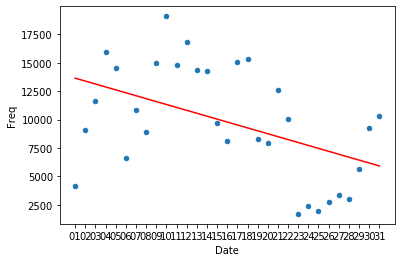

In [31]:
#Analysis postings by date
dataFrame =  baseDataFrame.dropna(subset=['Date'])
dataFrame['Date'] = dataFrame['Date'].dt.strftime('%d')
dataFrame = dataFrame.loc[0:, ['Date']].sort_values(by=['Date'])
dataFrame['Freq'] = dataFrame.groupby('Date')['Date'].transform('count')
dataFrame = dataFrame.drop_duplicates()
ax = dataFrame.plot.scatter(x='Date', y='Freq')

dates = []
for i in range(1,32):
    dates.insert(len(dates),i)    

d = np.polyfit(dates, dataFrame['Freq'],1)
f = np.poly1d(d)
dataFrame.insert(2,'Treg',f(dates))
dataFrame.plot(x='Date', y='Treg', color='Red', legend=False,ax=ax)

### Market by Sectors

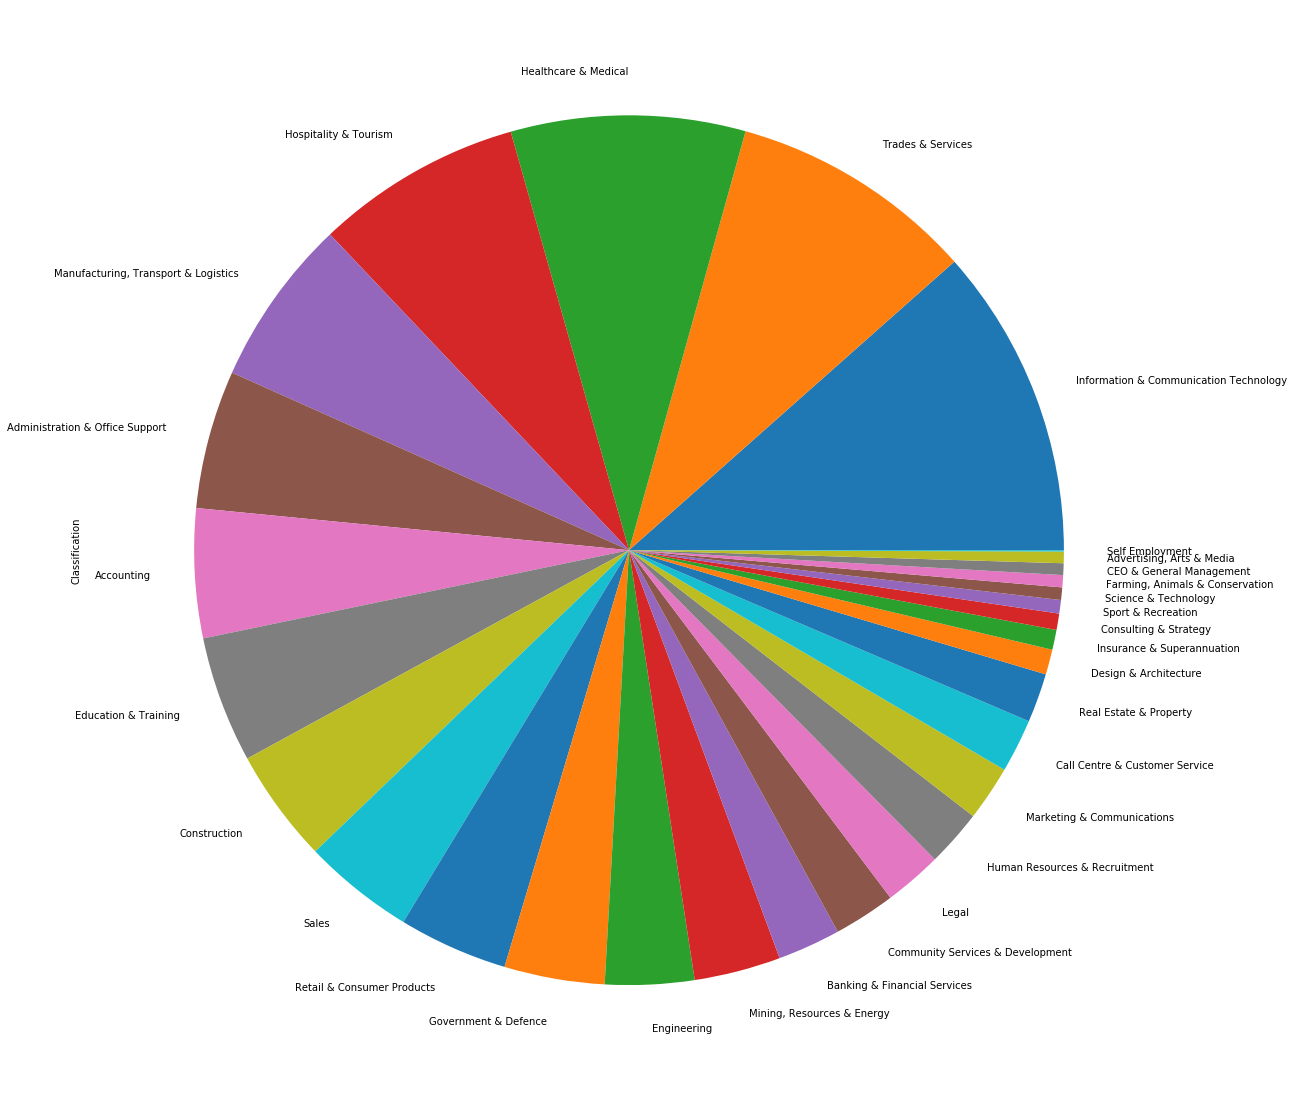

In [32]:
#Get share of the market by sectorss
dataFrame = baseDataFrame.dropna(subset=['Classification'])
dataFrame = dataFrame.loc[0:, ['Classification']]
value_bins = dataFrame["Classification"].value_counts()
value_bins.plot.pie(y='Classification', figsize=(20, 20))

In [33]:
#Find the Highest paying sector
dataFrame = baseDataFrame.dropna(subset=['Classification', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Classification','AverageSalary']]
for index, row in dataFrame.groupby('Classification', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['Classification'], "average wage: " ,row['AverageSalary'])

CEO & General Management average wage:  254.23800959232614
Information & Communication Technology average wage:  181.97513749887295
Consulting & Strategy average wage:  152.55841924398626
Mining, Resources & Energy average wage:  128.57120868438108
Construction average wage:  125.54096845736817
Legal average wage:  121.32042594385285
Engineering average wage:  120.72649976381672
Healthcare & Medical average wage:  116.9413312600921
Banking & Financial Services average wage:  110.24699866607381
Government & Defence average wage:  103.66503838101885
Science & Technology average wage:  100.31762065095398
Self Employment average wage:  91.38709677419355
Human Resources & Recruitment average wage:  89.64011327259296
Design & Architecture average wage:  89.25641741071429
Accounting average wage:  87.17640997830803
Insurance & Superannuation average wage:  85.9415081042988
Marketing & Communications average wage:  84.43684879288438
Sales average wage:  82.0781898177247
Real Estate & Property 

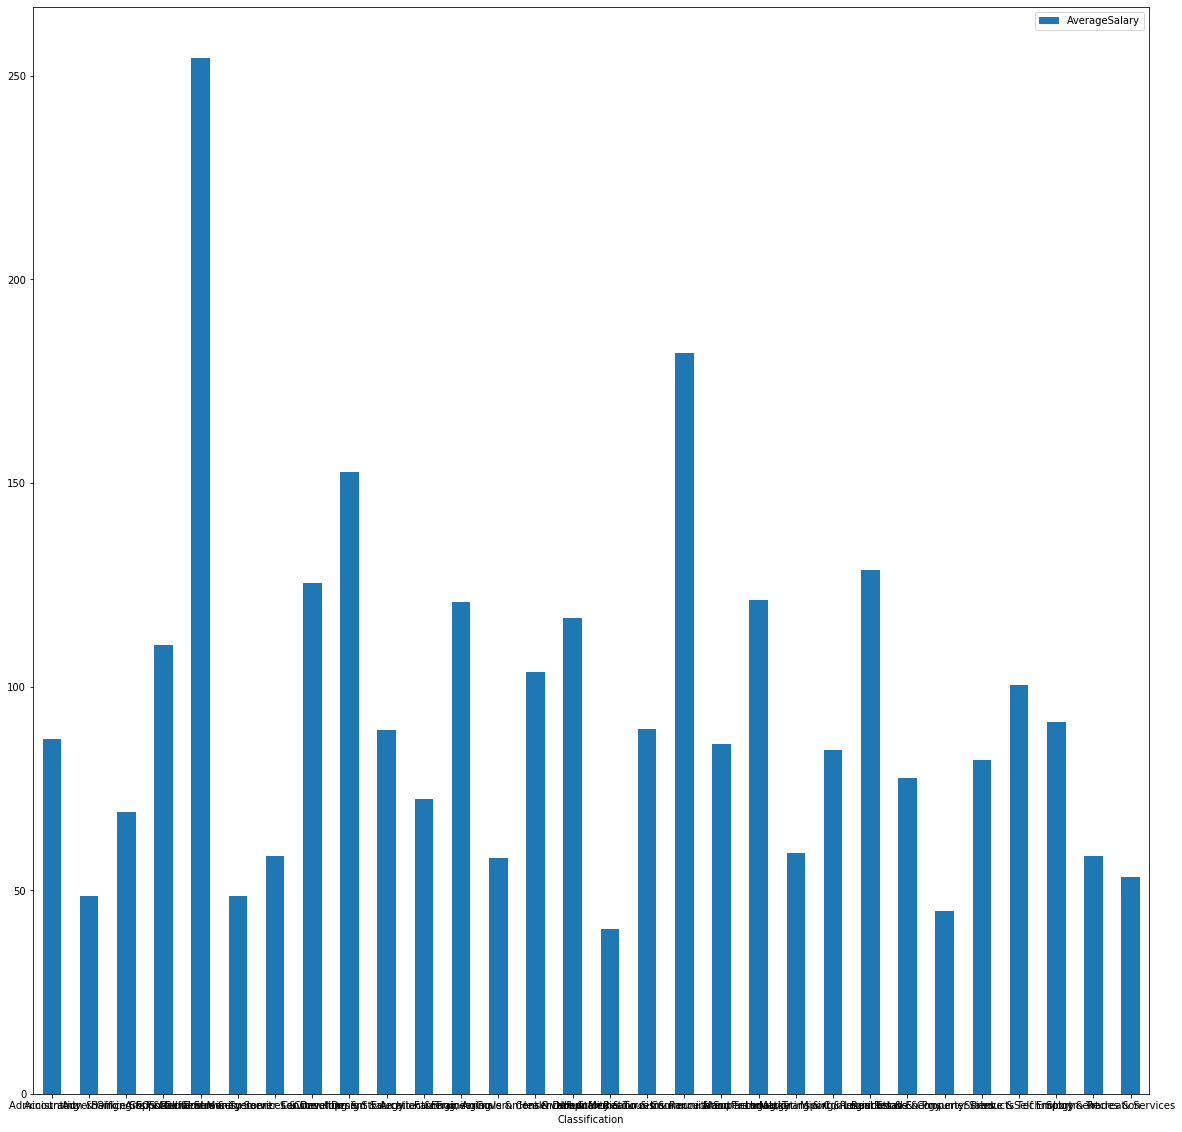

In [42]:
#Compare average salary for each sector
dataFrame.groupby('Classification', as_index=False)['AverageSalary'].mean().plot.bar(x='Classification', y='AverageSalary', rot=0, figsize=(20,20))

In [130]:
#Find the highest paying subclassification in each classification
dataFrame = baseDataFrame.dropna(subset=['Classification', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['Classification','SubClassification','AverageSalary']]
dataFrame.groupby(['Classification']).max()

,SubClassification,AverageSalary
Classification,,
Accounting,Treasury,599.5
Administration & Office Support,Records Management & Document Control,599.5
"Advertising, Arts & Media",Promotions,599.5
Banking & Financial Services,Treasury,599.5
CEO & General Management,Other,599.5
Call Centre & Customer Service,Supervisors/Team Leaders,599.5
Community Services & Development,Volunteer Coordination & Support,599.5
Construction,Surveying,599.5
Consulting & Strategy,Strategy & Planning,599.5


In [105]:
#Find the Highest paying subsector
dataFrame = baseDataFrame.dropna(subset=['SubClassification', 'AverageSalary'])
dataFrame =  dataFrame.loc[0:, ['SubClassification','AverageSalary']]
for index, row in dataFrame.groupby('SubClassification', as_index=False)['AverageSalary'].mean().sort_values(by=['AverageSalary'], ascending=False).iterrows():
    print(row['SubClassification'], "average wage: " ,row['AverageSalary'])

General Practitioners average wage:  411.20304975922954
Medical Specialists average wage:  365.2213687150838
COO & MD average wage:  343.3921568627451
CEO average wage:  311.2453987730061
Architects average wage:  281.71291390728476
Programme & Project Management average wage:  252.09502739148758
General/Business Unit Manager average wage:  246.48333333333332
Police & Corrections average wage:  243.22033898305085
Company Secretaries average wage:  237.38888888888889
Consultants average wage:  206.38140161725067
Corporate Finance & Investment Banking average wage:  201.78
Oil & Gas - Drilling average wage:  201.13888888888889
Management & Change Consulting average wage:  198.06567164179106
Oil & Gas - Engineering & Maintenance average wage:  197.94607843137254
Business/Systems Analysts average wage:  197.24567174515235
Residents & Registrars average wage:  194.7490566037736
Security average wage:  193.7826086956522
Generalists - In-house average wage:  182.93515850144092
Oil & Gas - Exp

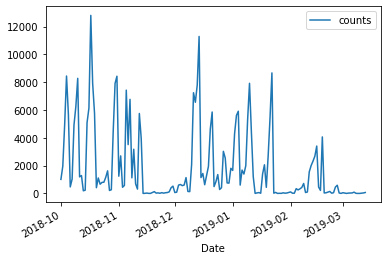

In [98]:
#Visualise jobs over time
dataFrame = baseDataFrame.dropna(subset=['Date'])
dataFrame = dataFrame.loc[0:, ['Date']]
dataFrame = dataFrame.value_counts().reset_index(name='counts')
dataFrame.set_index('Date').plot()

### Textual Analaysis 

In [131]:
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15eth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15eth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
def normalize(document):
    # TODO: remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])
    
    # TODO: tokenize text
    tokens = nltk.word_tokenize(text)
    
    # TODO: Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

original_documents = [x.strip() for x in data['text']] 
documents = [normalize(d).split() for d in original_documents]
documents[0]

NameError: name 'data' is not defined